---
# SGD Regression


A maioria dos aplicativos de aprendizado de máquina / aprendizado profundo usa uma variante de descida de gradiente chamada descida de gradiente estocástico (SGD), na qual, em vez de atualizar parâmetros com base na derivada do conjunto de dados em cada etapa, você atualiza com base na derivada de uma amostra escolhida aleatoriamente . Além de ser menos tributável computacionalmente, a pesquisa mostrou que a aleatoriedade envolvida no SGD permite convergir e superar os mínimos locais mais rapidamente.

---

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [21]:
os.getcwd()

'/Users/stephanieliu/Desktop/GitHub/SegundoSemestre/CD_Projeto3'

In [22]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [34]:
GPD = dados["GDP_PerCapita"]
beer = dados["Beer_PerCapita"]
Happy = dados["HappinessScore"]


In [35]:
list(dados)

['Country',
 'Region',
 'Hemisphere',
 'HappinessScore',
 'HDI',
 'GDP_PerCapita',
 'Beer_PerCapita',
 'Spirit_PerCapita',
 'Wine_PerCapita']

In [38]:
x = dados["GDP_PerCapita"]
x = np.log(x)

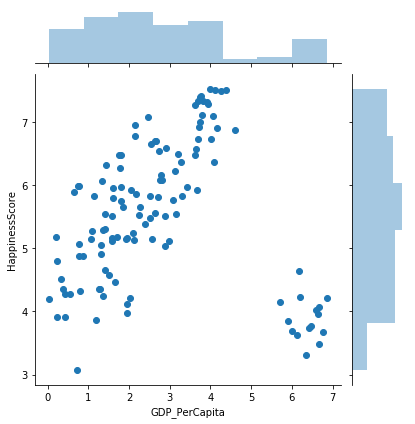

In [39]:
sns.jointplot(x, Happy);
plt.show()

In [26]:
M=1

In [10]:
def evaluate(M):
    price_predicted = predict(M, area)
    MSE = ((price - price_predicted)**2).mean()
    return MSE

In [11]:
def learn(M):
    j = random.randint(0, len(GPD) - 1) # escolher uma amostra
    deriv = 2*(M*GPD[j] - beer[j])*M   # calculo da derivada 
    M = M - 0.005*deriv                   # SGD update step
    return M

In [12]:
# print ("Valor inicial de M: ", M)
# for i in range(0, 2000):
#     M = learn(M)
#     if i % 100 == 0:
#         print ("Perda: ", evaluate(M), "(M =", M, ")")


## Testando códigos do livro!!

In [13]:
from sklearn.linear_model import SGDRegressor

In [14]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [15]:
list(dados)

['Country',
 'Region',
 'Hemisphere',
 'HappinessScore',
 'HDI',
 'GDP_PerCapita',
 'Beer_PerCapita',
 'Spirit_PerCapita',
 'Wine_PerCapita']

In [42]:
x = dados[['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]

In [43]:
sgd_reg.fit(x, Happy)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([-2.06510647e+11]),
 array([ 7.98636225e+12,  2.75356456e+12,  1.34437676e+13, -4.87930143e+12,
        -6.74860333e+12]))

In [41]:
sgd_reg.predict([[0,0,0,0,0]])

array([-2.06510647e+11])

# Plotando o gráfico 